In [20]:
# For matrix computation,For m 
import numpy as np

# For data manipulation 
import pandas as pd

# For 2D plotting 
from matplotlib import pyplot as plt

# For 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

# For Building model
from sklearn.linear_model import LogisticRegression

# For Calculating Performance
from sklearn import metrics

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Load data set and display first few observations
dataset = pd.read_csv("pima-indians-diabetes.data", names = names)
dataset.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Mathematics Behind PCA :

PCA can be thought of as an unsupervised learning problem. The whole process of obtaining principle components from a raw dataset can be simplified in **six Steps :**

- 1.Take the whole dataset consisting of d+1 dimensions and ignore the labels such that our new dataset becomes d dimensional.
- 2.Compute the mean for every dimension of the whole dataset.
- 3.Compute the covariance matrix of the whole dataset.
- 4.Compute eigenvectors and the corresponding eigenvalues.
- 5.Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.
- 6.Use this d × k eigenvector matrix to transform the samples onto the new subspace.

In [4]:
# Step 1 : 1.Take the whole dataset consisting of d+1 dimensions and ignore the labels(Target) such that our new dataset 
            # becomes d dimensional.

 # Define features
X = dataset.iloc[:,0:8]

# Define categorical outcome 
y = dataset.iloc[:,8]

In [7]:
# Step 2.Compute the mean for every dimension of the whole dataset.

X_mean = np.mean(X,axis = 0)

print(X_mean)

preg      3.845052
plas    120.894531
pres     69.105469
skin     20.536458
test     79.799479
mass     31.992578
pedi      0.471876
age      33.240885
dtype: float64


In [8]:
# Standardize feature space to have mean 0 and variance 1

X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)

In [9]:
# Step 3: Find covariance matrix of X

# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False)

# Note that covariance matrix is 8x8 since their are 8 features
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


In [10]:
# Step 4: Obtain eigenvectors and eigenvalues

# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 8x8 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]

Eigenvalues of Cov(X): 
[2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]


In [11]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

eig_pairs

[(2.097110557994526,
  array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
         -0.45194134, -0.27061144, -0.19802707])),
 (1.733467259447125,
  array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
          0.1009598 ,  0.122069  , -0.62058853])),
 (1.0309722810083823,
  array([ 0.01308692, -0.46792282,  0.53549442,  0.2376738 , -0.33670893,
          0.36186463, -0.43318905, -0.07524755])),
 (0.8766705419094789,
  array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
         -0.05364595, -0.8336801 , -0.0712006 ])),
 (0.7633383156496717,
  array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
         -0.25320376, -0.11981049,  0.10928996])),
 (0.6835183858447285,
  array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
         -0.68537218,  0.08578409,  0.03335717])),
 (0.4203635280495677,
  array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
         -0.03536644, -0

In [12]:
# Step 5 (continued): Sort eigenvalues in descending order.Sort the eigenvectors by decreasing eigenvalues and choose
  # k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.


# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[2.097110557994526, 1.733467259447125, 1.0309722810083823, 0.8766705419094789, 0.7633383156496717, 0.6835183858447285, 0.4203635280495677, 0.4049893778148985]


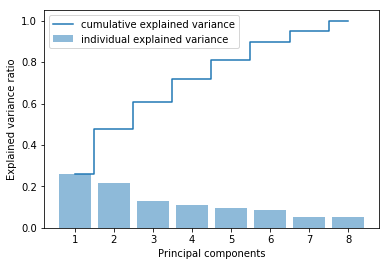

In [14]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


# The plot shows that the first principal component alone accounts for 28 percent of the variance. 
# Also, we can see that the first two principal components combined explain almost 50 percent of the variance 
# in the data.

In [15]:
# Step 6: Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:4]).transpose()

# Let's  project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

In [27]:
Proj_data_2D.shape


(768, 4)

In [17]:
X_std.shape, P_reduce.shape, Proj_data_2D.shape

((768, 8), (8, 4), (768, 4))

In [18]:
from sklearn import model_selection 

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_2D, y, test_size=test_size, random_state=seed)

In [21]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy)

0.7272727272727273


C:\Users\kovvu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)


In [23]:
cm

array([[124,  23],
       [ 40,  44]], dtype=int64)

In [24]:
from sklearn import metrics
cm1 = metrics.classification_report(y_test,y_pred)

In [25]:
print(cm1)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       147
           1       0.66      0.52      0.58        84

   micro avg       0.73      0.73      0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

